<a href="https://colab.research.google.com/github/go555666/UTS_ML2019_ID13510577/blob/master/Assignment2_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet for Malware classification with image representation 


---


## Machine Learning(32513) Spring 2019

### Jinho Go(13510577) - Github (https://github.com/go555666/UTS_ML2019_ID13510577)


In [0]:
from google.colab import files
from IPython.display import Image

In [50]:
upload = files.upload()

Saving AV-test_fig1 .png to AV-test_fig1  (2).png
Saving Fig_2.png to Fig_2 (1).png
Saving Fig_6.png to Fig_6.png
Saving fig3.png to fig3 (2).png
Saving fig4.png to fig4 (2).png
Saving fig5.png to fig5 (2).png
Saving Table_2.png to Table_2.png
Saving table1.png to table1 (2).png


In [0]:
Fig_1 =Image('AV-test_fig1 .png',
             width = 700,
             height = 500
      )
Fig_2 = Image('Fig_2.png',
             width = 700,
             height = 500
      )
Fig_3 = Image('fig3.png',
             width = 700,
             height = 500
              )
Fig_4 = Image('fig4.png',
             width = 700,
             height = 500
              )
Fig_5 = Image('fig5.png',
             width = 400,
             height = 250
              )
Fig_6 = Image('Fig_6.png',
             width = 400,
             height = 250
             )

Table_1 = Image('table1.png',
             width = 700,
             height = 500
             )
Table_2 = Image('Table_2.png',
             width = 700,
             height = 500
             )



# 1. Introduction


---
As the Internet has became popular, modern society is increasingly dependent on the cyber environment. Modern people can access economic activities and communications in the cyber environment anytime, anywhere with the development of wireless Internet and smartphones. In addition, companies and governments can maximize the sustainability of their administration and business activities and get the information they need for their business quickly, through the network. According to these examples, it is clear that cyber environment enriches our lives. Despite these advantages, refer to criminology fundamentals, new changes create opportunities for new kind of crime.(Grabosky et al. 2001). These changes lead new types of threats called cybercrime. Especially, for companies and governments, which deal with thier secret imformation, cybersecurity breaches are the biggest damage.(Chen et al. 2018). This is because intellectual property assets and the personal information are things which is their unique asset and cannot secure from the markets. Therefore, companies and governments are constantly investing to protect their intellectual assets from many types of cyber threats and prevent attackers’ infiltration. According to Cybersecurity Ventures' 2019 ACR, cybercrime is expected to incur organizational and corporate costs of $ 6 trillion annually through 2021(Casey 2019). Among the cyberthreats, malware is the sending of malicious software to infect the entire network of individual or organizations. Malware intrusions can be fatal. The result is data theft, seize of network systems or disability of network function. Therefore, malware analysis takes a important section in cybersecurity. Furthermore, modern malware, which has metamorphosis and polymorphism feature, proliferates new variants. The new malware variants, which has the same malicious effect but can automatically proliferate new variants that appear as completely different executable files, obstruct the malware identification by traditional rule-based approach, called ‘Signature method’(Hou et al. 2016). Currently, most of Intrusion Detection Systems (IDS) implemented for monitoring company network or system are employing signature method for malware analysis. In hence, if we discover a method to cope with the constantly changing malware rather than the signature method, it can make a big influence in the cybersecurity industry. 


For the aim, in this report is going to propose more flexible approach than signature method by using ResNet, which is kind of deep learning model applied on diverse image tasks, with image representation for malware classification. On section 2, the reasons why are deep residual learning(ResNet) and image representation adopted are going to describe. Also, the dataset and preprocessing will be explained. On section 3, by comparing the result of accuacy with signature method, we will evaluate whether ResNet is a good model for malware classification. Based on the results, on section 5 and 6, we are going to suggest improvements and ,in terms of ethical/social aspect, adopt ethical model on the model.

# 2. Methodogy 

---

This chapter is going to describe the reasons why are deep residual learning(ResNet) and image representation adopted. Furthermore, the dataset and preprocessing will be explained.

### 2.1 Image representation for Malware classification
For malware classification, there are 2 main approaches. The first approach is signature approach. As a traditional method on malware analysis, it extracts binary signatures from malware. However, due to malware proliferation, each year new signatures are created, new rules for them must be studied and they are not flexible. Fig_1 shows that the number of malware and the variants are increasing steadily every year.

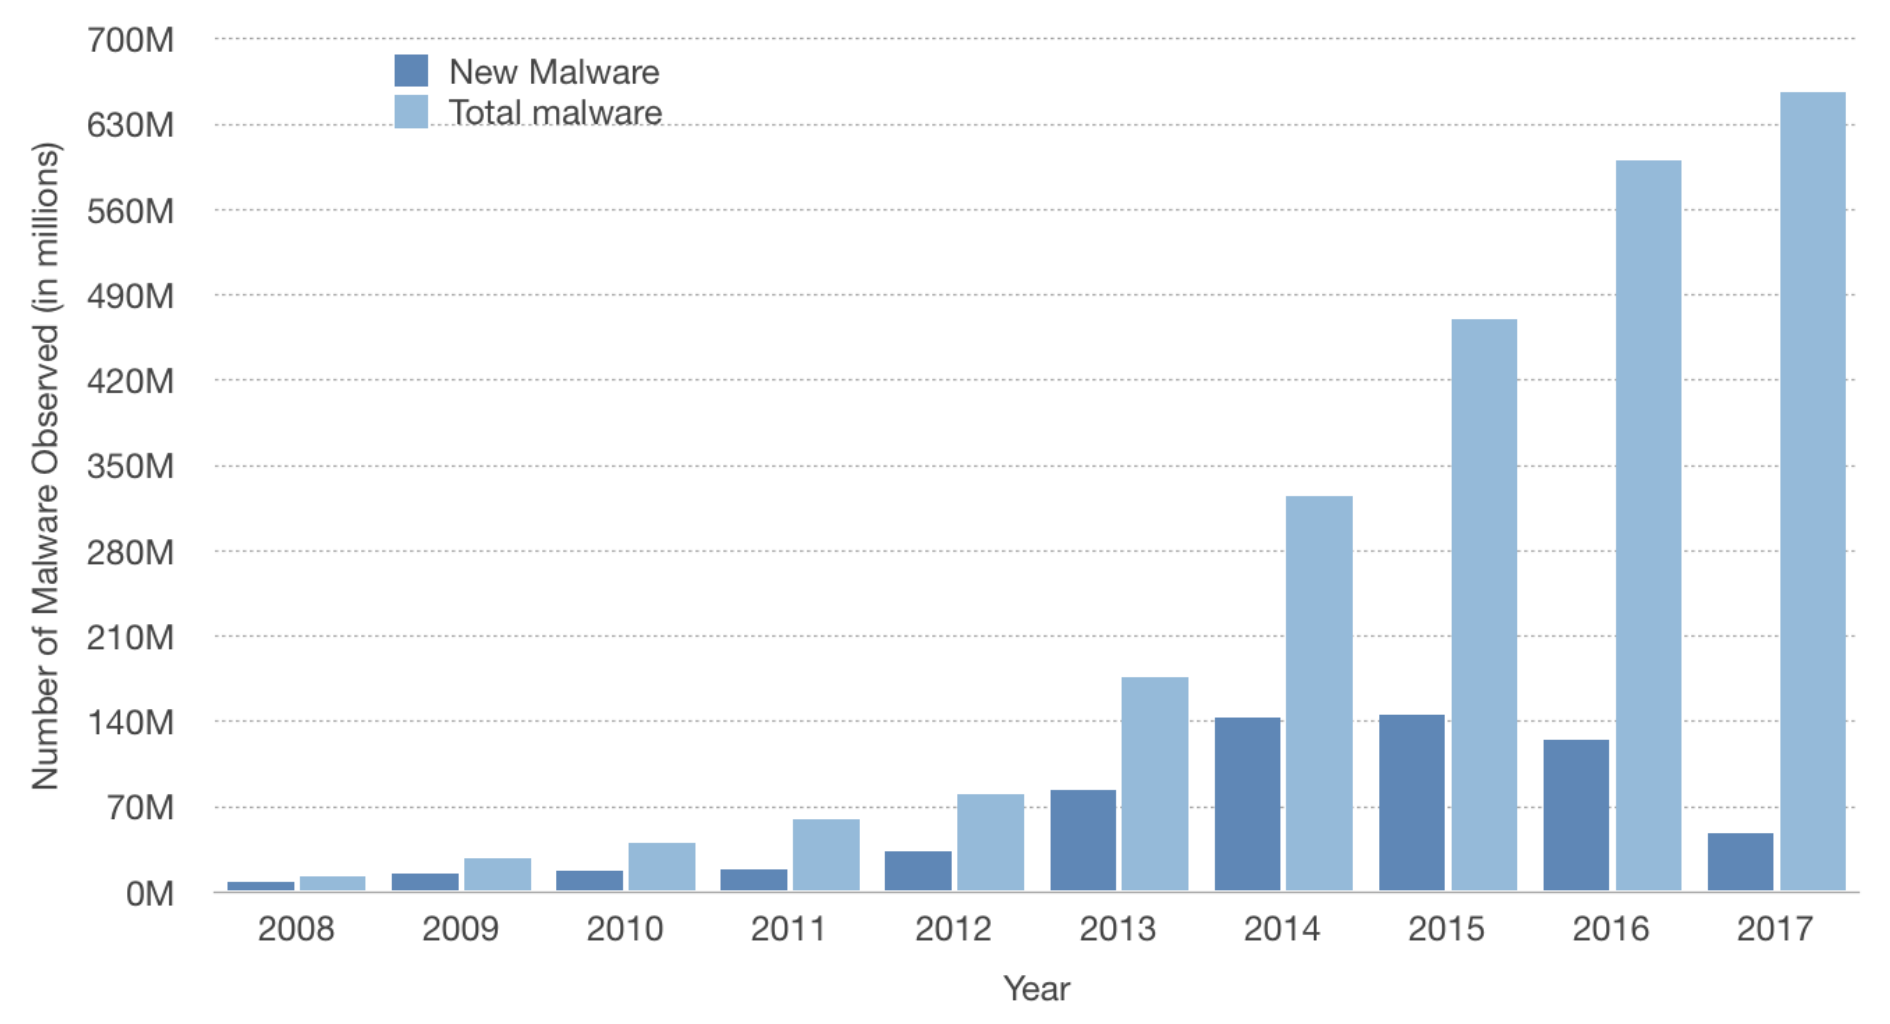

In [0]:
Fig_1

Secondly, static and dynamic analysis. Static analysis finds malicious patterns by analyzing code and navigating the control flow of the executable(Nataraj et al. 2011). For analysis malware, static analysis needs decryption or unpacking before analysis. On the other side, Dynamic analysis runs the code in a virtual environment and brings about behavior reports by tracing execution(Nataraj et al. 2011). Unlike Static analysis, Dynamic analysis does not need decryption or unpacking on the malware binary file. And it shows more efficient performance than Static analysis. Though, it requires plenty of time and resource, which leads to scalability issues. In addition, when the environment does not meet the activating conditions, part of malicious behavior may not be observed.

In case of image conversion from executable approach, it is relatively free about problems arising from the previous approach. On the same malware family, Malware variant images show similarity.(Fig_2) On the other hand, between different malware family, Malware variant images show distinguishable features.(Fig_3)

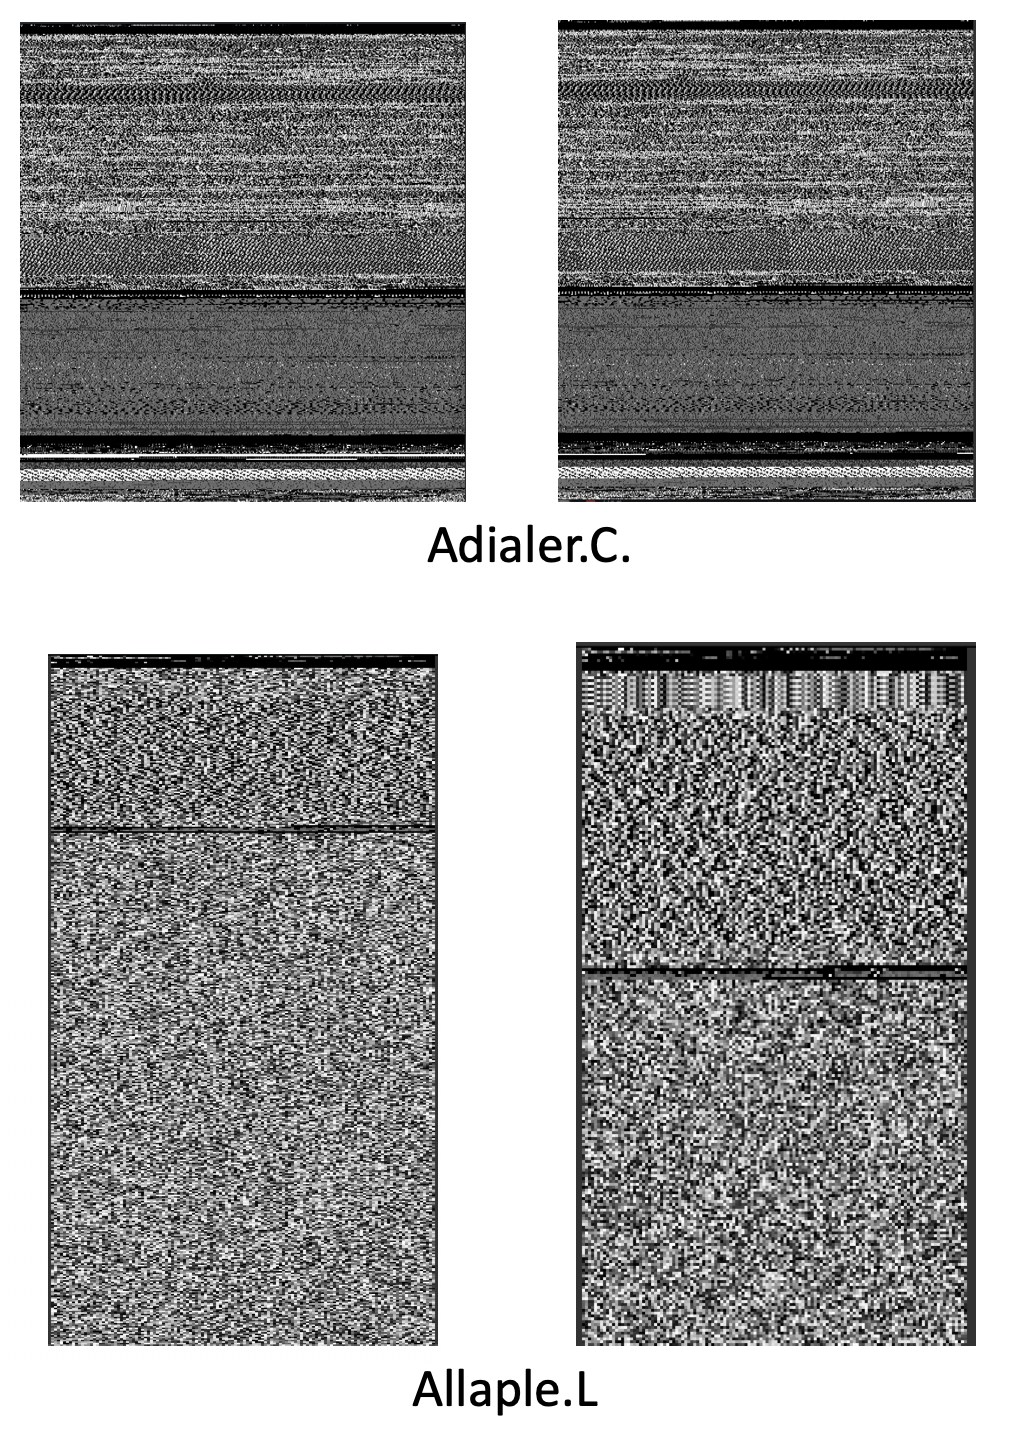

In [39]:
Fig_2


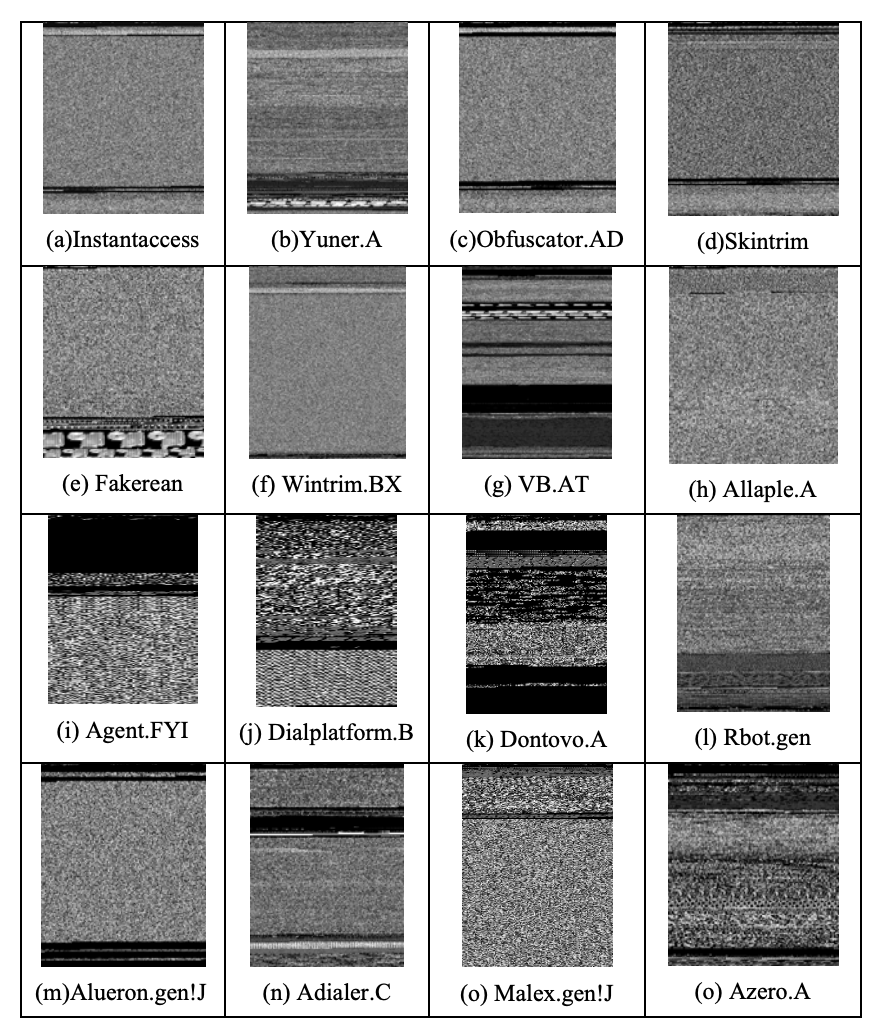

In [44]:
Fig_3

And for visualizing malware executable, it does not need decryption or unpacking, and the virtual environment. As a result, Image representation for Malware classification can be efficient alternative on above approach.

### 2.2 Dataset and pre-processing data 
For this project, we use the modified Malimg dataset to evaluate the ResNet model. The original Malimg dataset is consisted of 9,161 malware samples, which are included in 25 classes. However, the frequency distribution of data is not balanced.(Fig_3)


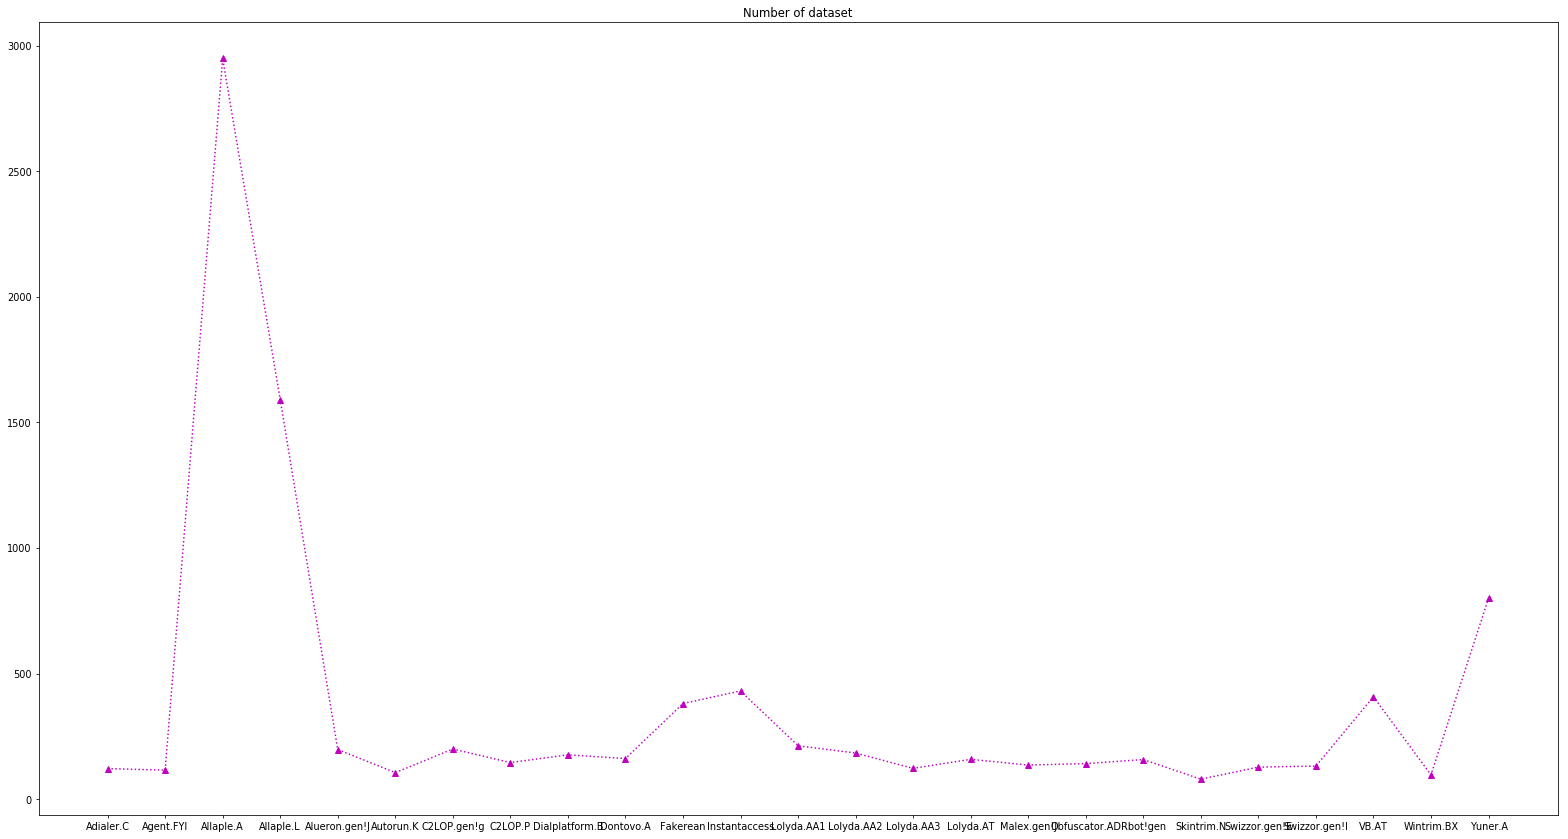

In [45]:
Fig_4

In case of Allaple.A and Allaple.L family, they have more than 1500 number of variants. On the other hand, Agent.FYI , Autorun.K , Skintrim.N and Wintrim.BX have less than 100 number of variants. To supplement these family data, we collected some malware samples from Malshare API, which is one of malware repository. And, transform binay files to grayscale images(Code_1)

In [0]:
Code_1
import numpy,scipy, os, array

filename = '459d5f31810de899f7a4b37837e67763'
f = open(filename,'rb')
ln = os.path.getsize(filename) # length of file in bytes
width = 256
rem = ln%width

a = array.array("B") # uint8 array
a.fromfile(f,ln-rem)
f.close()

g = numpy.reshape(a,(len(a)/width,width))
g = numpy.uint8(g)
scipy.misc.imsave('459d5f31810de899f7a4b37837e67763.png',g) # save the image

As a result, we added 21 Adialer.C variants, 18 Agent.FYI variants, 23 Autorun.K variants, 22 Malex.gen!J variants, 15 Skintrim.N variants, 24 Swizzor.gen!E variants, 22 Swizzor.gen!I variants and 33 Wintrim.BX variants on the original Malimg dataset with the conversion processes from binary file to grayscale images. (Table_1)

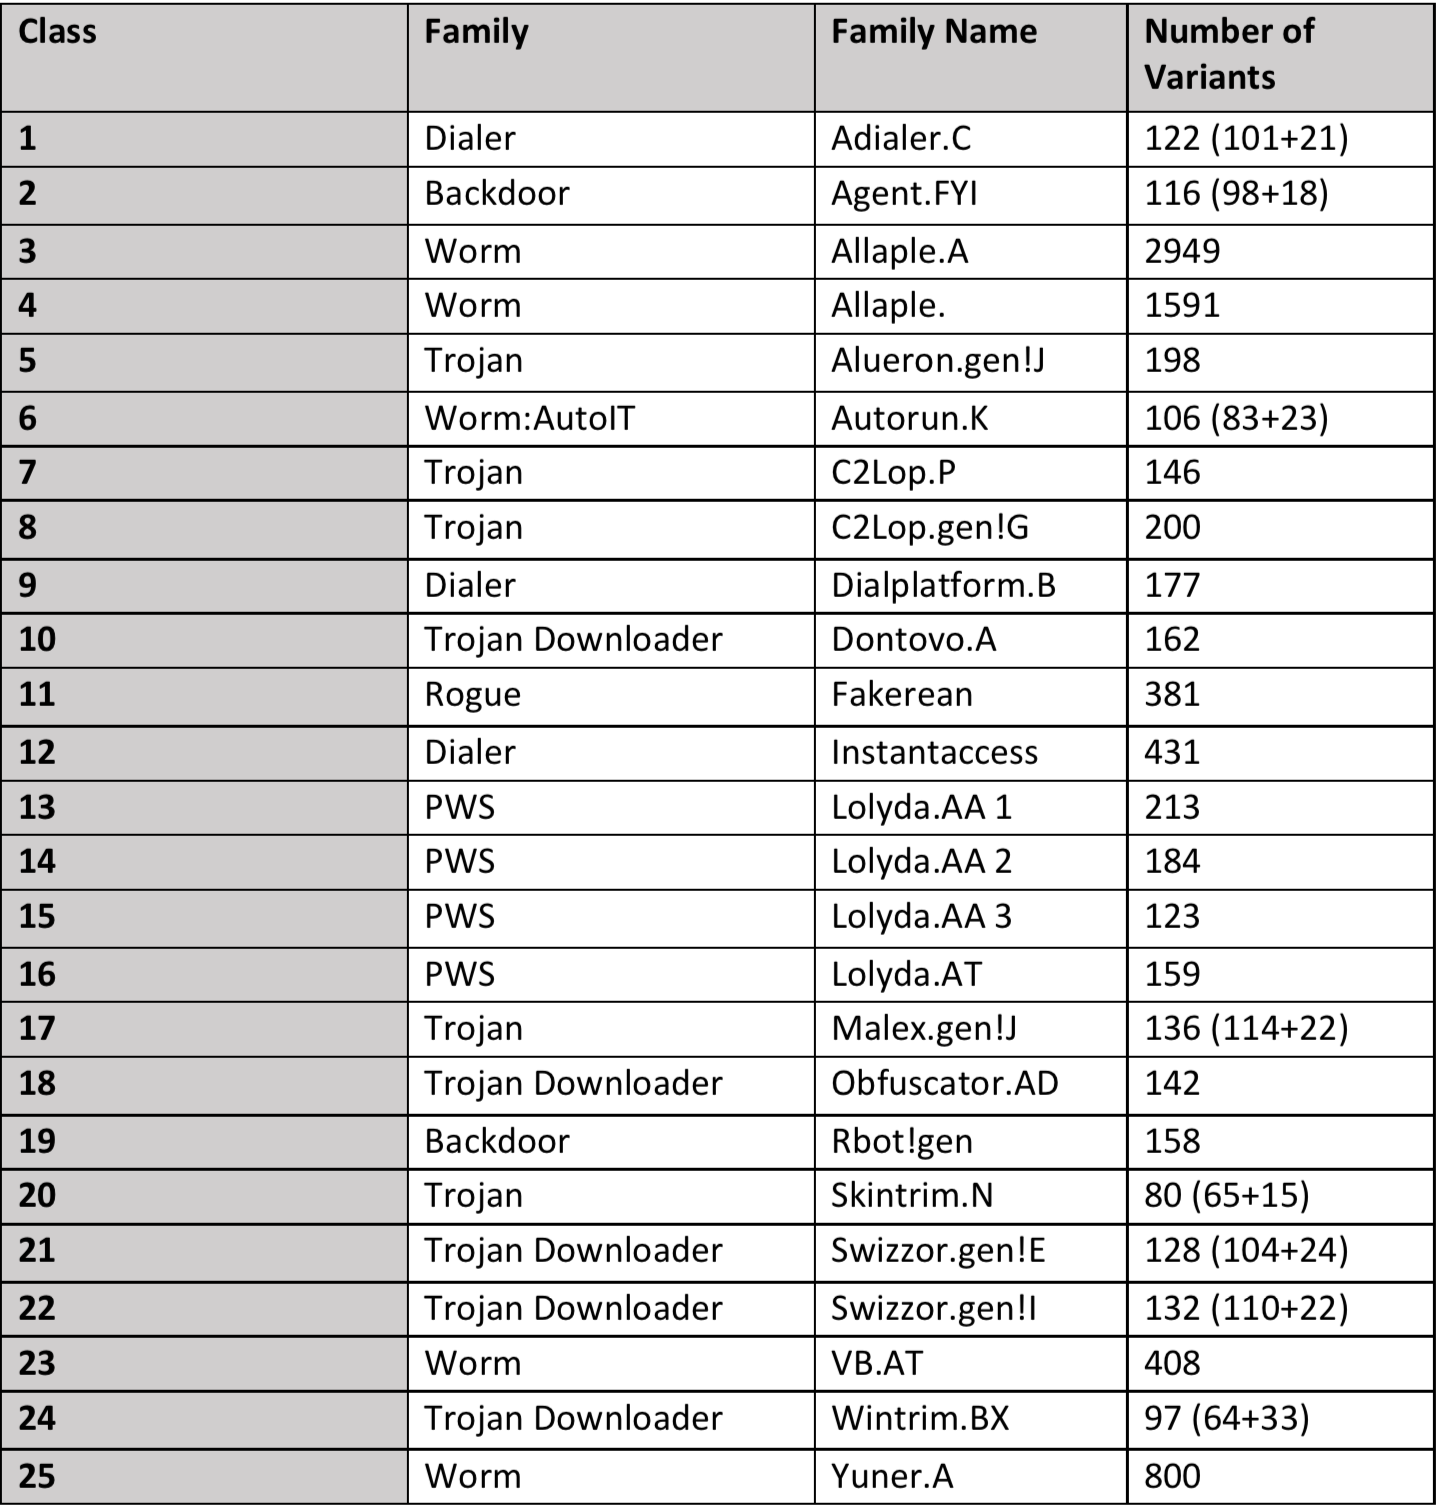

In [0]:
Table_1

The width size of the images are all the same. However, height size is different. Thus, all images were resized to 64x64. It also reduces size, which reduces the burden of time complexity.

### 2.3 Deep residual learning
As a class of deep learning, Convolutional Neural Network (CNN) is applied on image classification and recognition tasks because of its high accuracy(He et al. 2016). Basically, on CNN, features are extracted from the sample images, while they go through with layers, which included in CNN architecture. Hence, people tend to guess easily that CNN model with many layers shows better performance than the one with less layers. Unexpectedly, however, the CNN model, which is made up of many layers, causes a higher error rate than the CNN model, which consists of fewer layers. (Fig_5)
 (그림) As a result, we selects ResNet for malware classification, among the CNN models. 


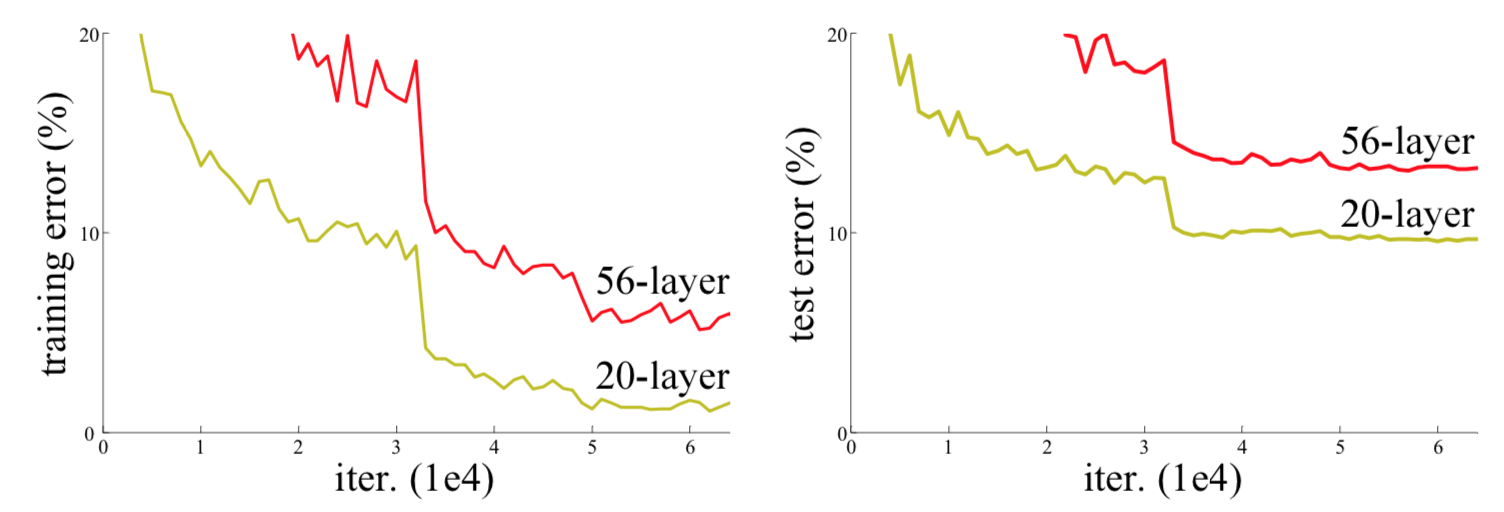

In [48]:
Fig_5

This degradation is caused by optimization failure, while going through many layers. To solve this problem, Deep residual learning, called ResNet, have suggested. ResNet starts with the intuition that residual mapping will be better optimized than original mapping, not from a mathematical background. 

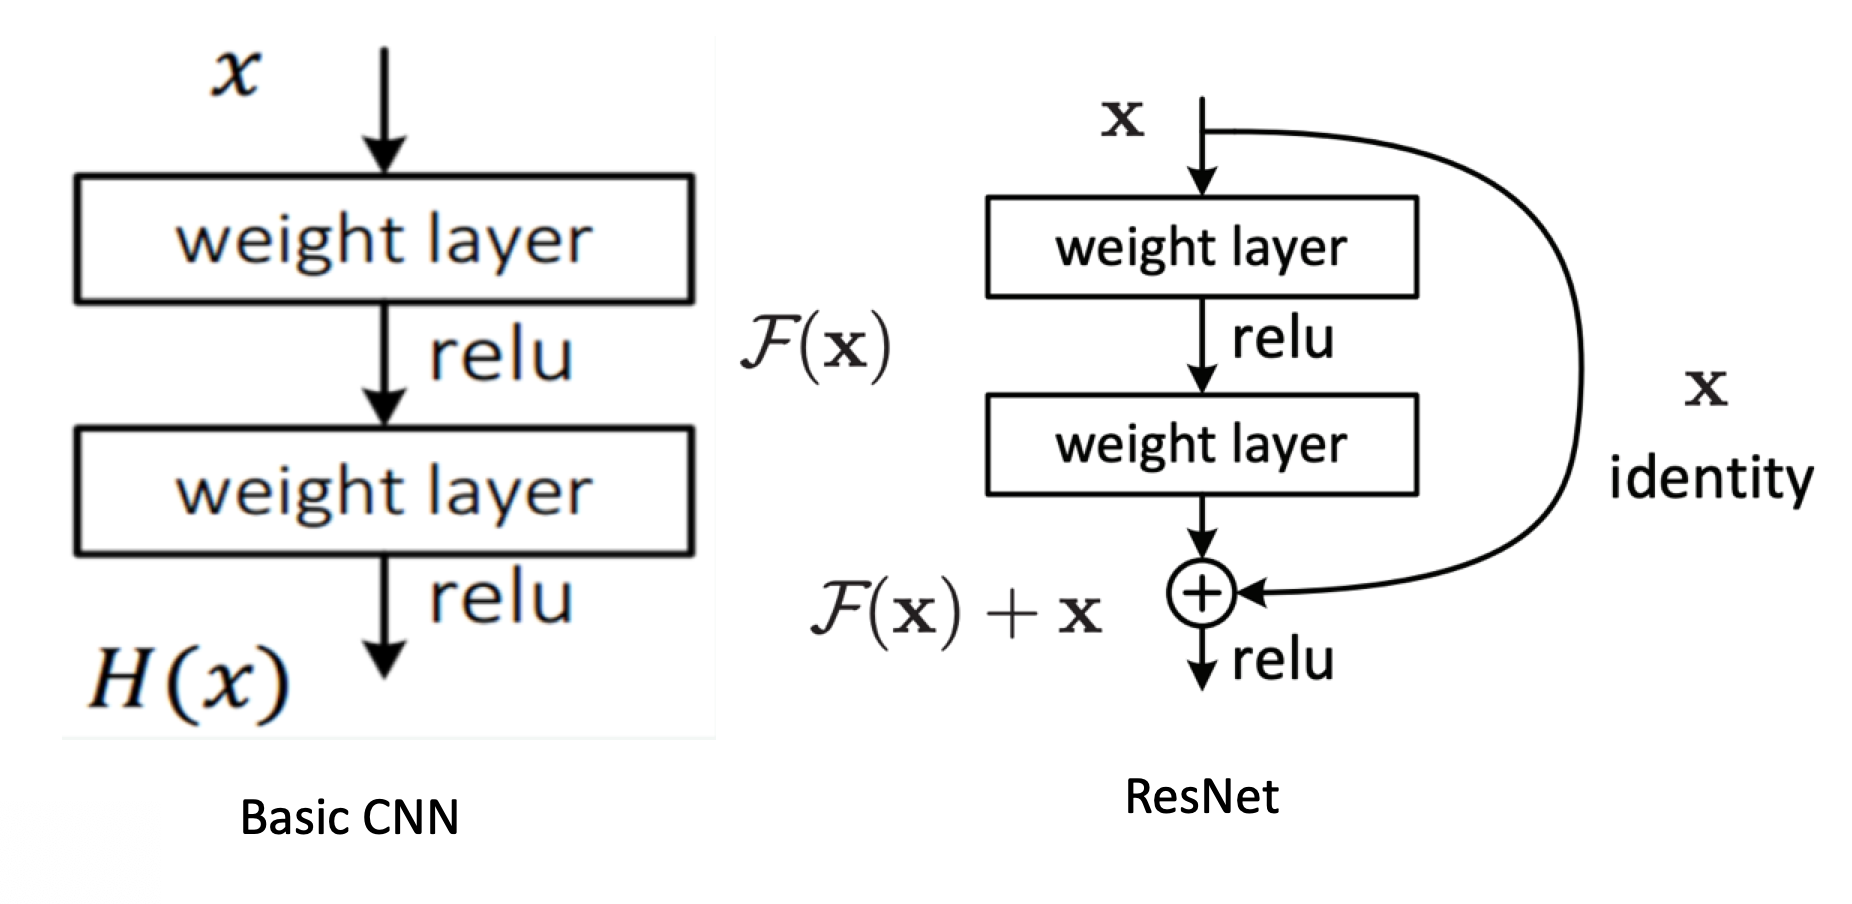

In [54]:
Fig_6

When original mapping defines H(x), basic model trains the entire input x to get the value of H(x). On the other hand, ResNet adds the previously accumulated data input x to the output and only train F(x) = H(x) - x, the difference between output and input. It reduces unnecessary training and makes easily to optimize feature. Due to focusing difference between input and output characteristic, we guess that ResNet is suitable model on malware images. Unlike normal images, malware variant images change slightly from the base frame.(Fig_2)

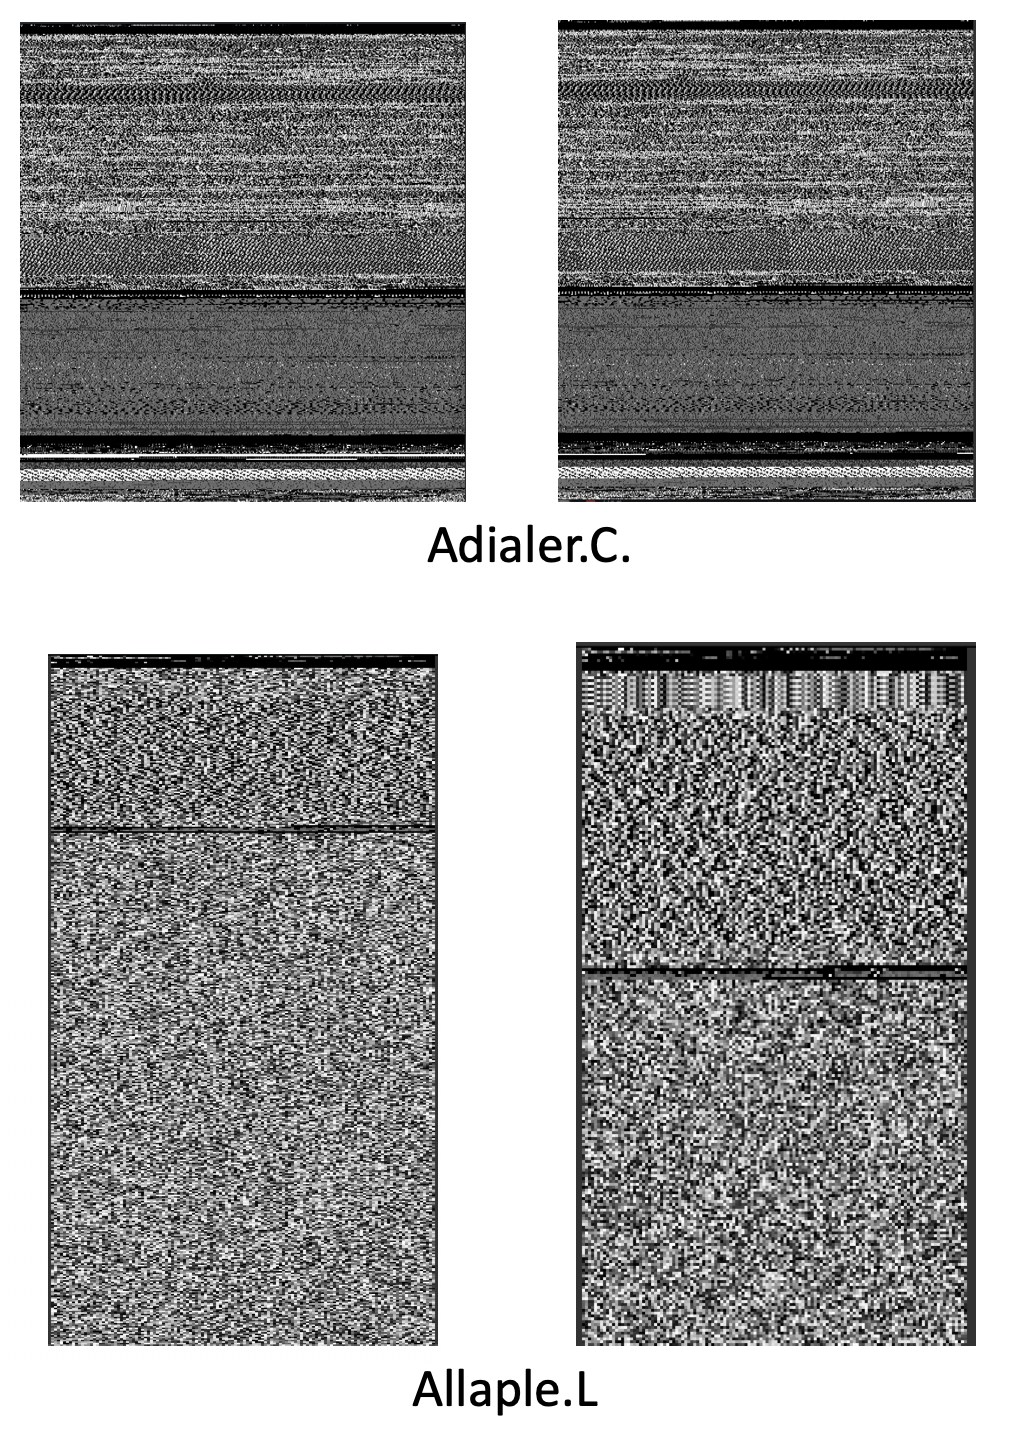

In [55]:
Fig_2

Therefore, ResNet can recognize the slight change and train the change. Through training, ResNet can classify new malware variant into correct malware family. Also, difference between the malware families is clear. (Fig_3)

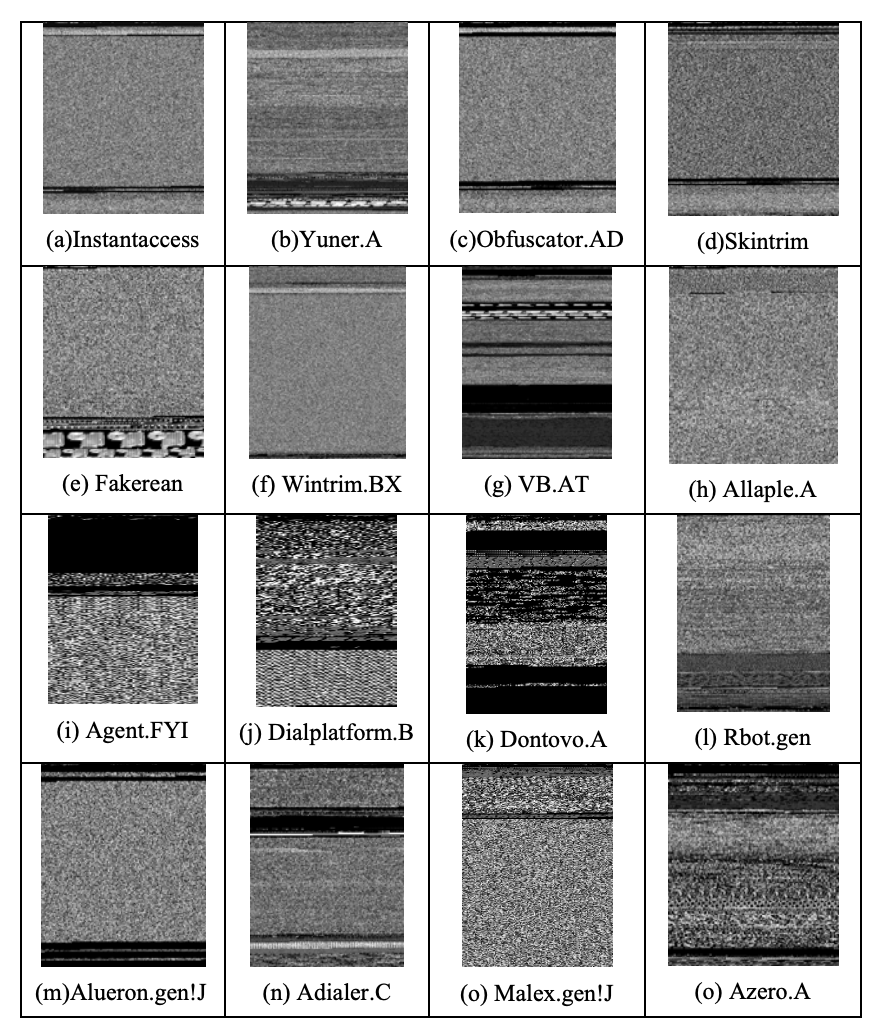

In [56]:
Fig_3

As a result, we selects ResNet for malware classification, among the CNN models. 

# 3. Experiments and Evaluation

---
 In this section, we are going to compare ResNet with ClamAV, which is kind of role-based method, and Malnet1 and Malnet2 which are kind of text-based methods and static analysis. The accuracy of the ClamAV, Malnet1 and Malnet2 malware classifications are compared based on the data provided by the (Lu et al. 2019) because the visual environment and huge computational complexity are required to get the results. ClamAV, Malnet1 and Malnet2 are evaluated by using DataCon and GeekPwn dataset. Firstly, DataCon is consisted of 15,000 testing data and 30,000 training data. It was generated for malware classification. Secondly, GeekPwn is consisited of 90,000 test data and 270,000 training data. 


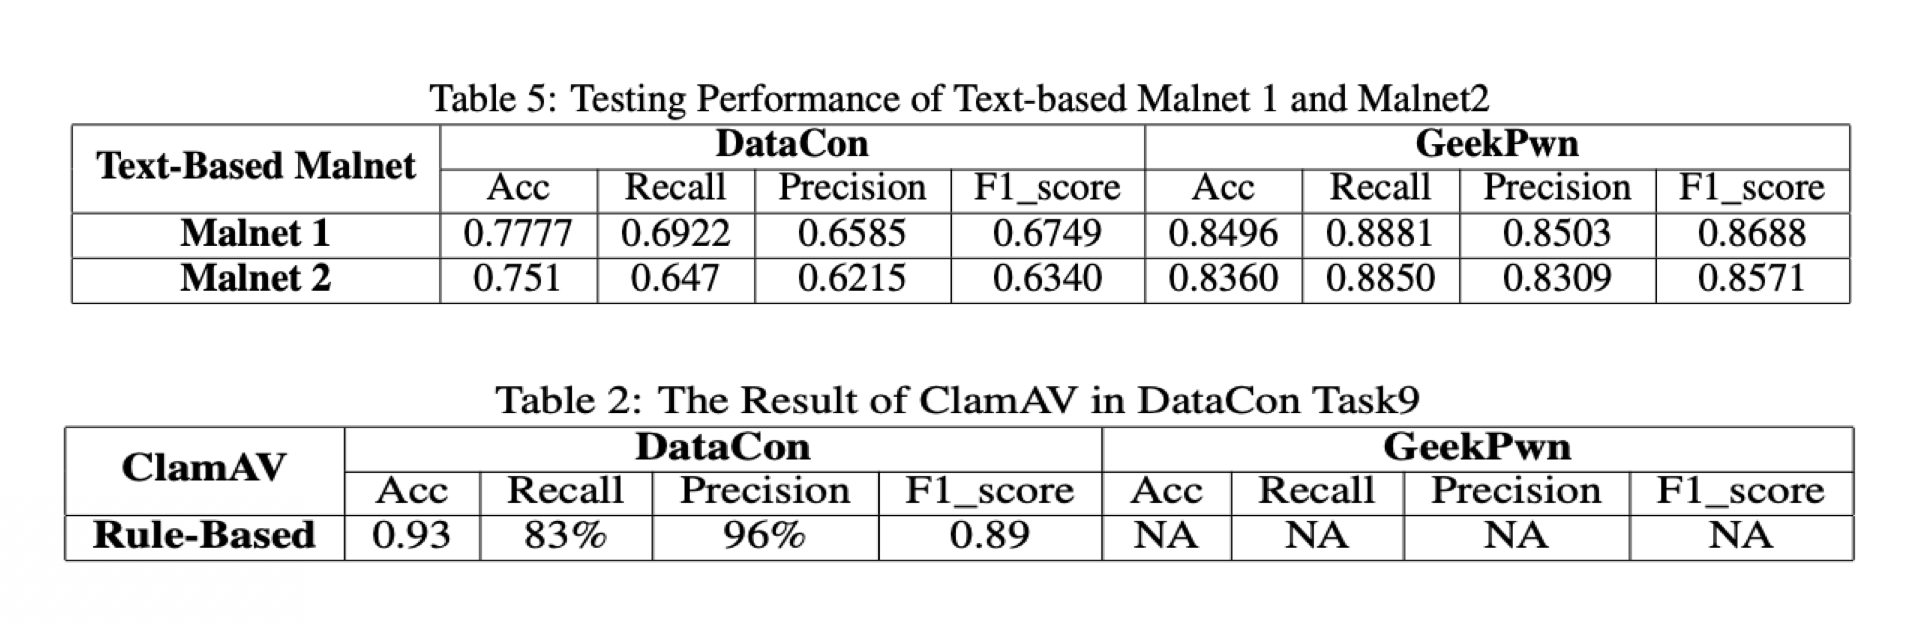

In [57]:
Table_2

In [0]:
# ResNet34 training and validation test
history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  
      verbose=2)


Epoch 1/20
 - 128s - loss: 0.4982 - acc: 0.8886 - val_loss: 0.3802 - val_acc: 0.9371
Epoch 2/20
 - 121s - loss: 0.2375 - acc: 0.9724 - val_loss: 0.3765 - val_acc: 0.9409
Epoch 3/20
 - 122s - loss: 0.1934 - acc: 0.9836 - val_loss: 0.3798 - val_acc: 0.9425
Epoch 4/20
 - 119s - loss: 0.1895 - acc: 0.9857 - val_loss: 1.9311 - val_acc: 0.7682
Epoch 5/20
 - 118s - loss: 0.2258 - acc: 0.9772 - val_loss: 1.6878 - val_acc: 0.5583
Epoch 6/20
 - 124s - loss: 0.1860 - acc: 0.9879 - val_loss: 0.3011 - val_acc: 0.9670
Epoch 7/20
 - 121s - loss: 0.1872 - acc: 0.9884 - val_loss: 0.3087 - val_acc: 0.9656
Epoch 8/20
 - 121s - loss: 0.1816 - acc: 0.9887 - val_loss: 0.3078 - val_acc: 0.9670
Epoch 9/20
 - 122s - loss: 0.1885 - acc: 0.9883 - val_loss: 0.3150 - val_acc: 0.9684
Epoch 10/20
 - 118s - loss: 0.1732 - acc: 0.9893 - val_loss: 0.3146 - val_acc: 0.9689
Epoch 11/20
 - 121s - loss: 0.1817 - acc: 0.9887 - val_loss: 1.5833 - val_acc: 0.8178
Epoch 12/20
 - 117s - loss: 0.2475 - acc: 0.9686 - val_loss: 13

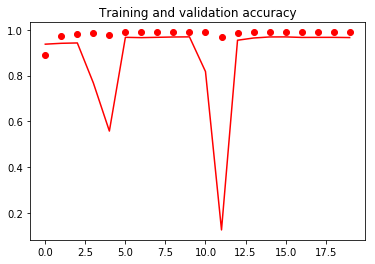

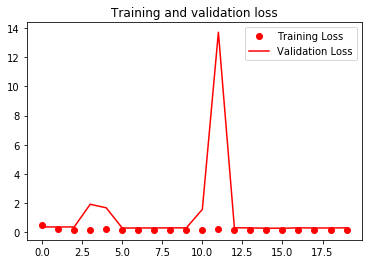

In [0]:
# Basic CNN training and validation accuracy graph
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
#Basic CNN accuracy
loss, acc = model.evaluate_generator(validation_generator, steps=140)
print("\n%s: %.2f%%" % (model.metrics_names[1], acc * 100))


acc: 96.73%


According to Table_2, ClamAV obtains 93% accuracy on DataCon. And, Malnet1 and Malnet2 were applied to both DataCon and GeekPwn with better results from GeekPwn.  Resnet, on the other hand, achieved 96.73% accuracy.
Although ResNet has a good result compared to other models, it is impossible to comfirm that ResNet is superior to other models because it does not experiment with a common dataset.However, it is competitive given the relatively low requirements than other approaches.

Next, we compare ResNet and Basic CNN to check wheather ResNet classifies Malware images better than other CNN models. For the experiment, we stacked 34 layer on ResNet and Basic CNN model. And, same input size. 

In [0]:
# Basic CNN training and validation test
history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  
      verbose=2)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
 - 133s - loss: 1.3416 - acc: 0.5491 - val_loss: 0.9201 - val_acc: 0.7193
Epoch 2/20
 - 118s - loss: 0.7505 - acc: 0.7942 - val_loss: 0.7164 - val_acc: 0.8119
Epoch 3/20
 - 120s - loss: 0.4603 - acc: 0.8944 - val_loss: 0.5474 - val_acc: 0.8659
Epoch 4/20
 - 117s - loss: 0.3873 - acc: 0.9205 - val_loss: 0.4353 - val_acc: 0.9162
Epoch 5/20
 - 115s - loss: 0.4072 - acc: 0.9181 - val_loss: 0.4084 - val_acc: 0.9252
Epoch 6/20
 - 122s - loss: 0.2900 - acc: 0.9521 - val_loss: 0.3413 - val_acc: 0.9494
Epoch 7/20
 - 117s - loss: 0.2576 - acc: 0.9602 - val_loss: 0.3325 - val_acc: 0.9559
Epoch 8/20
 - 118s - loss: 0.2441 - acc: 0.9684 - val_loss: 0.3090 - val_acc: 0.9610
Epoch 9/20
 - 119s - loss: 0.4517 - acc: 0.9011 - val_loss: 0.2943 - val_acc: 0.9228
Epoch 10/20
 - 116s - loss: 0.2577 - acc: 0.9233 - val_loss: 0.2292 - val_acc: 0.9366
Epoch 11/20
 - 120s - loss: 0.1629 - acc: 0.9479 - val_

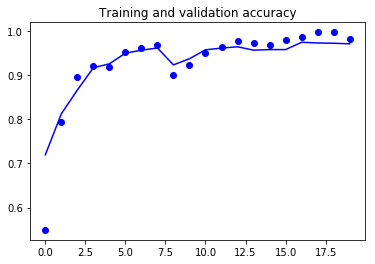

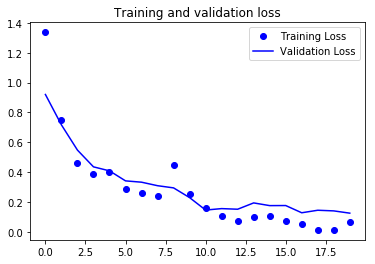

In [0]:
# Basic CNN training and validation accuracy graph
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
#Basic CNN accuracy 
loss, acc = model.evaluate_generator(validation_generator, steps=140)
print("\n%s: %.2f%%" % (model.metrics_names[1], acc * 100))


acc: 96.95%


Based on the result, we can check that ResNet model show better performance than Basic CNN at initial phrase. But, after 10 epoch, two models show similar performance. Also, the final accuracy was similar at 96.73% for ResNet and 96.95% for Basic CNN. According to this experiment, although ResNet first identified the characteristics of the image better than Basic CNN, it was discovered that it eventually became similar through training.

# 4. Conclusion

---

In general, malware analysis is performed by analyzing binary files. However, in this project, to classify the malware that proliferate its own variants by family, the binary file is converted into grayscale images and malware classification is performed using ResNet, a kind of cnn model. The results show competitive performance, although we could not compare signature methods and static analsis with the same dataset. There is still a lot of research into cnn models, and when the technology of converting binary files into image files quickly is discovered, malware analysis using image representation may be used in real time.


# 5. Ethical and social aspect

---

In the utilitarian approach, the ResNet for Malware classification is a ethically appropriate project. Because the ethical goal in the utilitarian approach is maximize the happiness of many people, it is that the techinque, which provides opportunity to efficiently identify and remove malware that enters their computers, is a vitue. Also, unlike signature, static and dynamic, this can help more people by minimizing the constraints required for malware classification. Of course, hackers, who send malware executable for data theft, are unhappy and need to find other way for data theft. However, the number of people, who gets benefit from the technipue, is more than hackers. 

Meanwhile, in terms of justice Approach, the act of sending malware is itself wrong. Because all human beings should be treated equally, hackers do not have the right to steal or harass the victims' personal information.

Our approach on the malware classification has obvious advantages, but also disadvantages. The advantage of this approach is that by converting the binary file into an image the same malware families have similar features and different malware families can be distinguished. Hackers can also reverse this simple principle to turn malware binary files into images to manipulate similar patterns between different malware families. In addition,because ResNet forms feature maps through training through datasets, it is possible to induce the formation of false feature maps by spreading the wrong dataset.

# 6. Reference

---
1) Lu, S., Ying, L., Lin, W., Wang, Y., Nie, M., Shen, K., Liu, L. & Duan, H. 2019, 'New Era of Deeplearning-Based Malware Intrusion Detection: The Malware Detection and Prediction Based On Deep Learning', arXiv preprint arXiv:1907.08356.

2) Casey, C. 2019, Hashedout, 80 Eye-Opening Cyber Security Statistics for 2019, viewed 2 June 2019 <https://www.thesslstore.com/blog/80-eye-opening-cyber-security-statistics-for-2019/>

3) Grabosky, E.P., Grabosky, P., Smith, R.G., Smith, R.G. & Dempsey, G. 2001, Electronic theft: Unlawful acquisition in cyberspace, Cambridge University Press.

4) Chen, J., Su, C., Yeh, K.-H. & Yung, M. 2018, 'Special Issue on Advanced Persistent Threat', Future Generation Computer Systems, vol. 79, pp. 243-6.

5) Hou, S., Saas, A., Chen, L. & Ye, Y. 2016, 'Deep4MalDroid: A Deep Learning Framework for Android Malware Detection Based on Linux Kernel System Call Graphs', pp. 104-11.

6) Nataraj, L., Karthikeyan, S., Jacob, G. & Manjunath, B. 2011, 'Malware images: visualization and automatic classification', ACM, p. 4.

7)He, K., Zhang, X., Ren, S. & Sun, J. 2016, 'Deep residual learning for image recognition', pp. 770-8.


